In [7]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="statsmodels", message="The pandas.core.datetools module is deprecated")
%matplotlib inline

import numpy as np
import pandas as pd

train = pd.read_csv('C:/Users/Igor Gitlevich/Documents/Academy/ML_project/train.csv')

In [8]:
train.head()
print("The train set # of observations is: ", len(train))
train.describe()

The train set # of observations is:  1460


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#No empty rows
null_rows_all = train.isnull().all(axis=1)
print(null_rows_all[null_rows_all!=False])


#Missingness
null_columns = np.sum(train.isnull(), axis=0)
null_columns[null_columns!=0]


Series([], dtype: bool)


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
#Impute 0
train['LotFrontage'] = train['LotFrontage'].fillna(0)

#Handle missigness by imputing with 'None' for categorical
train.groupby('Alley').size()
train['Alley'] = train['Alley'].fillna('None')
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna('None')
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['Electrical'] = train['Electrical'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageYrBlt'] = train['GarageYrBlt'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['PoolQC'] = train['PoolQC'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')


#Check again
null_columns = np.sum(train.isnull(), axis=0)
null_columns[null_columns!=0]

Series([], dtype: int64)

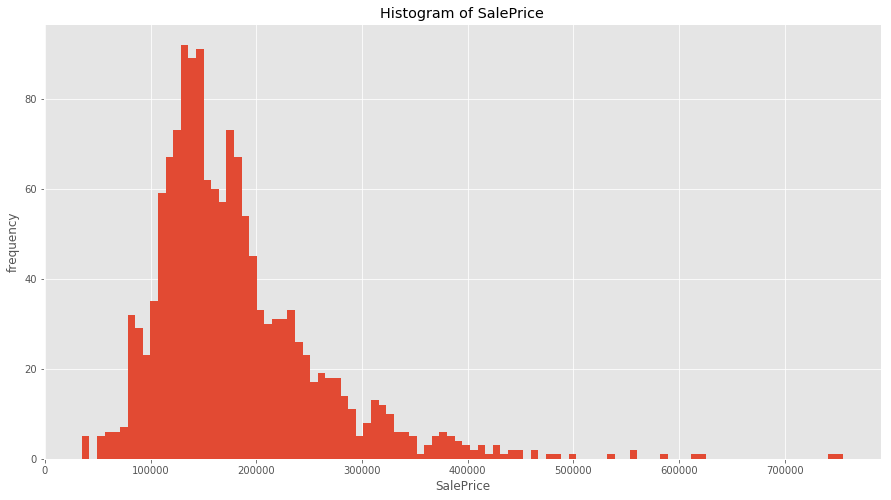

In [11]:
fig = plt.figure(figsize=(15,8))
plt.ylabel('frequency')
plt.xlabel('SalePrice',)
plt.title('Histogram of SalePrice')
train['SalePrice'].hist(bins=100)
plt.show()

In [60]:
#Skewed to the right, see which neighborhoods are responsible for skewness
#Over 500000
print("Over $500,000")
a = train[train['SalePrice'] > 500000].loc[:,'Neighborhood']
print(a.groupby(a).count())


#Over 700000
print("\n\nOver $700,000")
b = train[train['SalePrice'] > 700000].loc[:,'Neighborhood']
print(b.groupby(b).count())

#Number of houses in each neighborhood and mean SalePrice
print("\n\nAll Neighborhoods Sale Prices")
z = train.loc[:, ['Neighborhood', 'SalePrice']].groupby('Neighborhood').agg(['count', 'mean'])['SalePrice'].\
sort_values(by='count', ascending=False)
print(z.apply(round))


Over $500,000
Neighborhood
NoRidge    3
NridgHt    3
StoneBr    3
Name: Neighborhood, dtype: int64


Over $700,000
Neighborhood
NoRidge    2
Name: Neighborhood, dtype: int64


All Neighborhoods
              count      mean
Neighborhood                 
NAmes           225  145847.0
CollgCr         150  197966.0
OldTown         113  128225.0
Edwards         100  128220.0
Somerst          86  225380.0
Gilbert          79  192855.0
NridgHt          77  316271.0
Sawyer           74  136793.0
NWAmes           73  189050.0
SawyerW          59  186556.0
BrkSide          58  124834.0
Crawfor          51  210625.0
Mitchel          49  156270.0
NoRidge          41  335295.0
Timber           38  242247.0
IDOTRR           37  100124.0
ClearCr          28  212565.0
StoneBr          25  310499.0
SWISU            25  142591.0
Blmngtn          17  194871.0
MeadowV          17   98576.0
BrDale           16  104494.0
Veenker          11  238773.0
NPkVill           9  142694.0
Blueste           2  13750

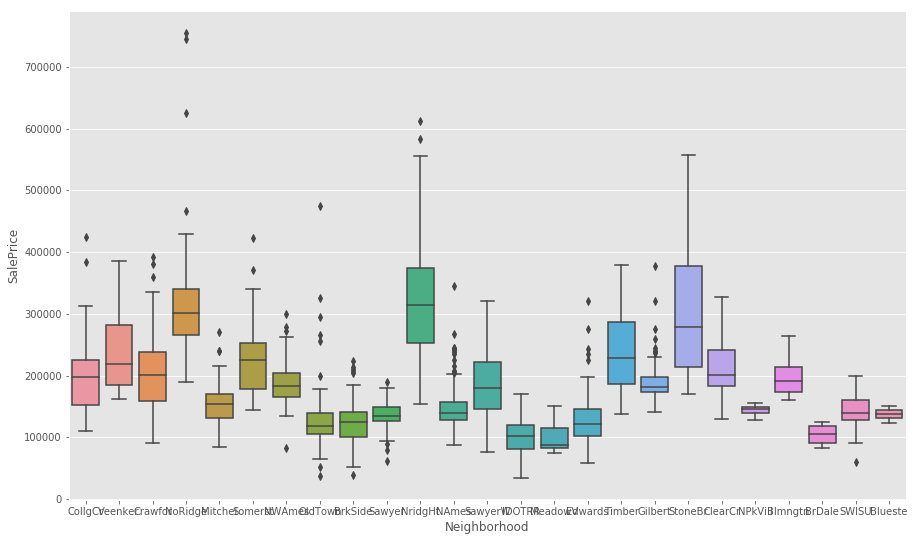

In [61]:
#Neighborhoods boxplots
import matplotlib.gridspec as gridspec
import seaborn as sns
fig = plt.figure(figsize=(15, 9))
sns.boxplot(y=train['SalePrice'], x=train['Neighborhood'])
plt.show()

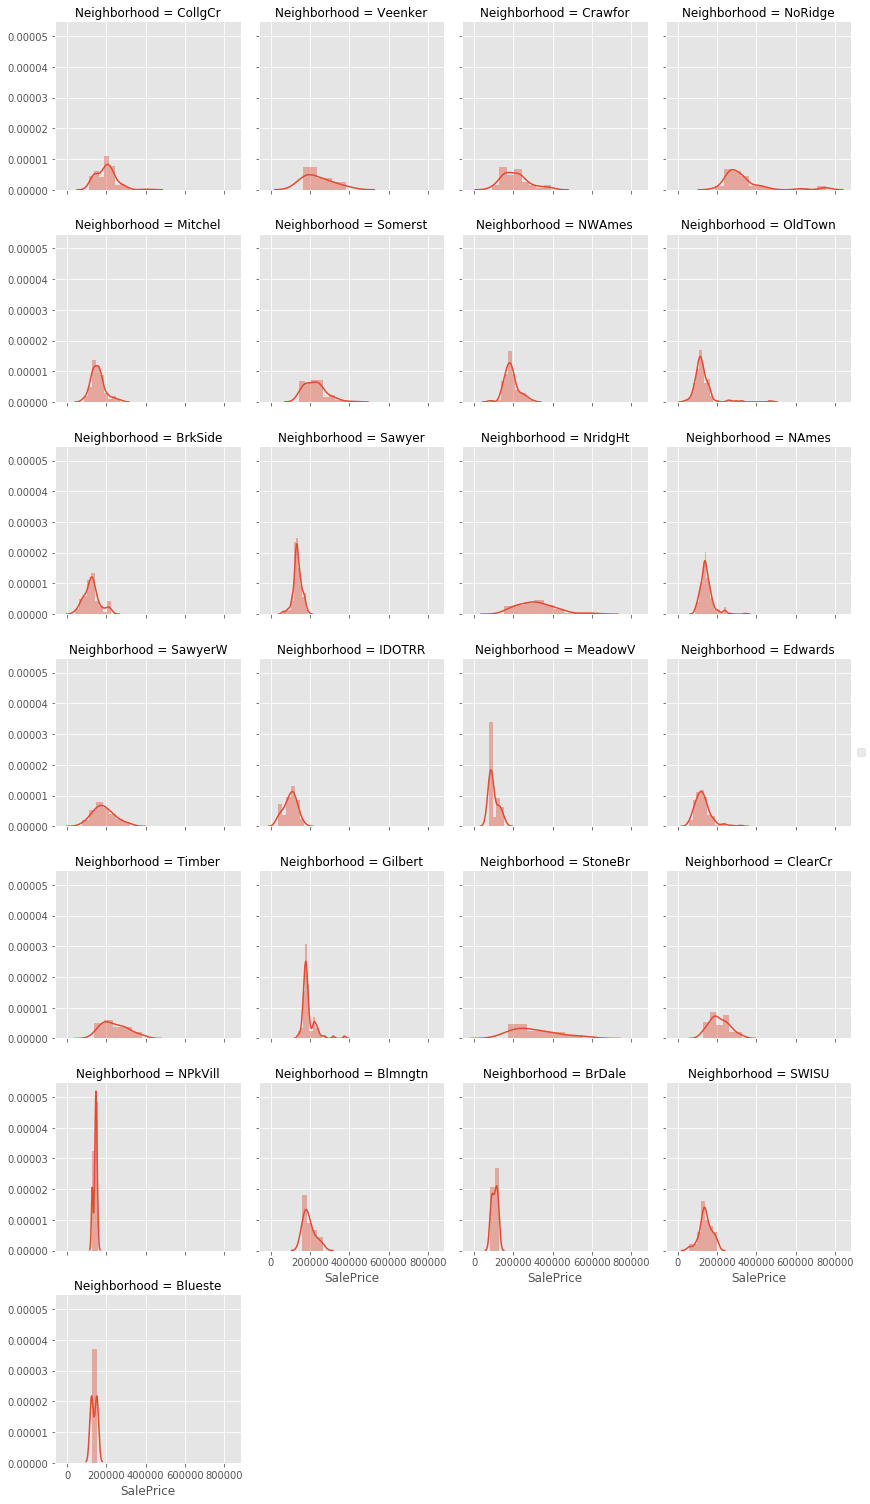

In [62]:
#Sale Price distribution per neighborhood
import seaborn as sns
fig = plt.figure(figsize=(25, 10))

NeighborhoodGrid= sns.FacetGrid(train, col='Neighborhood', palette="Set2", col_wrap=4)
NeighborhoodGrid.map(sns.distplot,'SalePrice')
NeighborhoodGrid.add_legend()

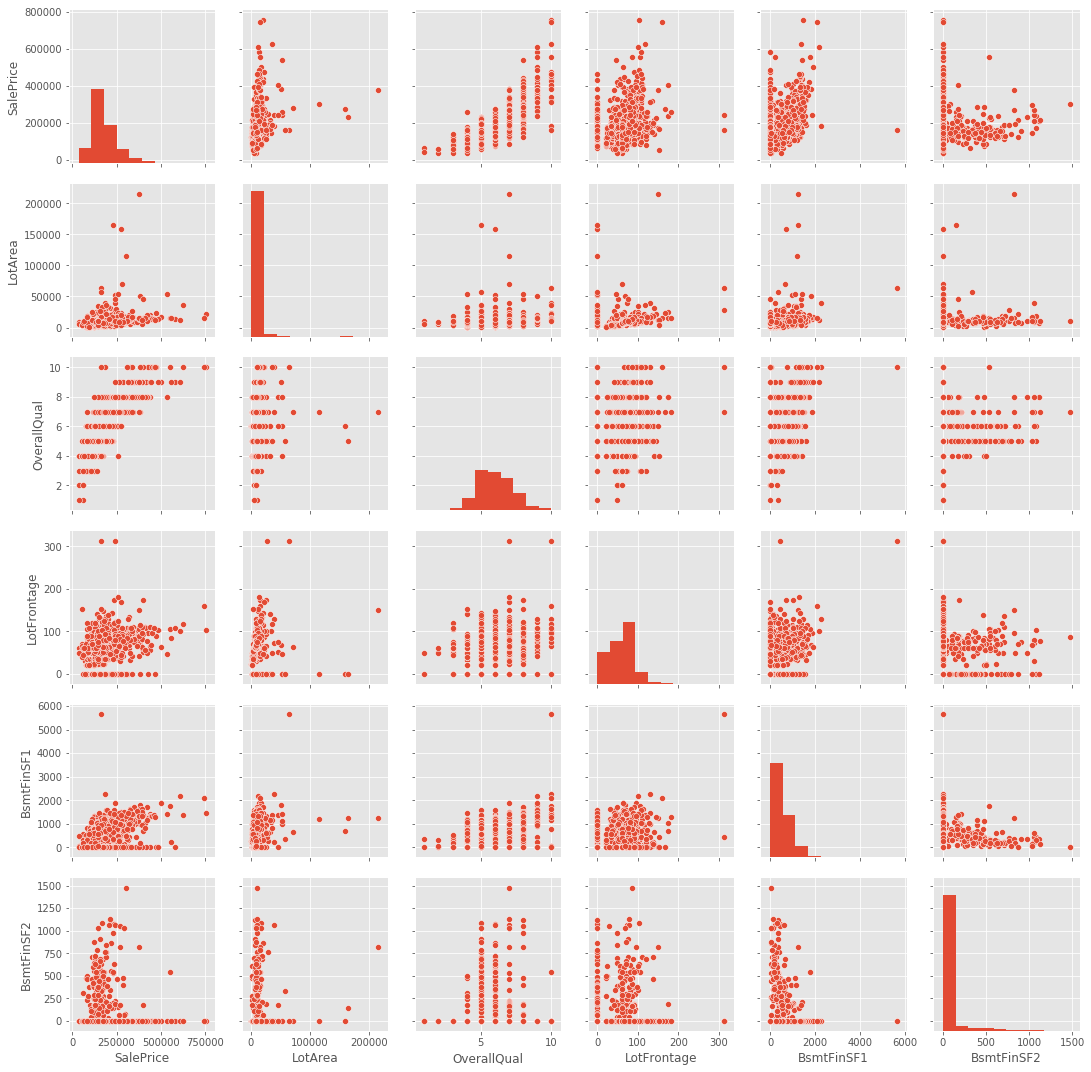

In [63]:
#Continue EDA
#Histograms and Scatterplots of continuous variables
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set( style ='whitegrid', context ='notebook') 
cols = ['SalePrice', 'LotArea', 'OverallQual', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2' ] 
sns.reset_orig()
sns.pairplot( train[cols]) 
plt.show()


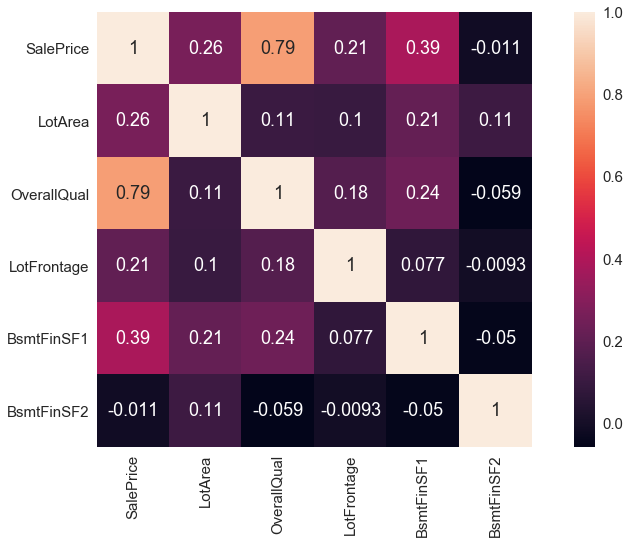

In [64]:
#Heatmap of correlation coefficients
import numpy as np
fig = plt.figure(figsize=(15,8))
cm = np.corrcoef( train[cols]. values.T)
sns.set( font_scale = 1.5)
hm = sns.heatmap( cm, 
                   cbar = True,
                   annot = True, square = True, 
                   yticklabels = cols, 
                   xticklabels = cols)
plt.show()

In [65]:
#Deriving SaleDate (assuming 1st of the month) - column is unused for now
train['SaleDate'] = train.YrSold.astype(str) + '-' + train.MoSold.astype(str) + '-01'
train['SaleDate'] = pd.to_datetime(train['SaleDate'], format='%Y-%m-%d').dt.date
train['SaleDate'].min()
#train['SaleDate'].max()

datetime.date(2006, 1, 1)

In [256]:
#Creating subset for training (outliers elimination WIP)

train_subset = train[train['SalePrice'] <= 500000]
train_subset = train_subset.reset_index()


In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

Y = train_subset['SalePrice']
X = pd.get_dummies(train_subset.iloc[:,1:80])
rf = RandomForestRegressor(n_jobs=8, n_estimators=5000, criterion='mse', max_depth=15, min_samples_leaf = 10, max_features =400,
                         bootstrap=True, oob_score=True, random_state=0) 
rf.fit(X,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=400, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=8,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [210]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, rf.predict(X))
print("MSE: %.4f" % mse)
rf.oob_score_

MSE: 442336903.9698


0.864214932726129

In [259]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

rmsle(Y, rf.predict(X))

0.11969950450522783

In [ ]:
import numpy as np
import sklearn.model_selection as ms
#R-squared for the train set
print(rf.score(X,Y))

scores = ms.cross_val_score(estimator=rf, X=X, y=Y, cv=3)
scores

0.9143416020079673


In [204]:
#Residuals (absolute values sorted in descending order)
abs(Y - rf.oob_prediction_).sort_values(ascending=False)

#Highest residual Neighborhood and the actual price - outliers were not predicted well
train.iloc[abs(Y - rf.oob_prediction_).sort_values(ascending=False).index,:].\
loc[:,['Neighborhood', 'SalePrice', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2' ]].iloc[0:30,:]

,Neighborhood,SalePrice,1stFlrSF,2ndFlrSF,BsmtFinSF1,BsmtFinSF2
691,NoRidge,755000,2444,1872,1455,0
1182,NoRidge,745000,2411,2065,2096,0
523,Edwards,184750,3138,1538,2260,0
1298,Edwards,160000,4692,950,5644,0
1169,NoRidge,625000,1831,1796,1387,0
898,NridgHt,611657,2364,0,2188,0
803,NridgHt,582933,1734,1088,0,0
769,StoneBr,538000,1690,1589,1416,0
688,StoneBr,392000,1419,0,945,0
1324,Somerst,147000,1795,0,0,0
